In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cplot

In [1]:

fname, paint = './Gaugin.jpg', 'Paul Gaugin'
# fname, paint = './van_gogh.jpg', 'Vincent van Gogh'
# fname, paint = './mondriaan.jpg', 'Piet Mondrian'
image = Image.open(fname)

width, height = image.size
print(width, height, width/height)
scale = 2
image = image.resize((width//scale, height//scale))
width, height = image.size
print(width, height, width/height)
im = np.array(image)
print(im.shape)
# plt.imshow(im)
# plt.show()

im = np.array(image.rotate(-90, expand=True))

print(im.shape)
nx, ny = im.shape[0], im.shape[1]
imlist = np.array([[*im[i,j]/255,1] for i in range(nx) for j in range(ny)])
print(imlist.shape)

ratio = ny/nx
print(ratio)
x0, x1, y0, y1 = -2, 2, -2*ratio, 2*ratio
p = np.array([i + 1.j*j for i in np.linspace(x0,x1,nx) for j in np.linspace(y0,y1,ny)], dtype=np.complex_)
print(p.shape)
# plt.scatter(p.real, p.imag, c=imlist, marker='.')
# plt.gca().set_aspect('equal')
# plt.show()

1883 2498 0.7538030424339471
941 1249 0.7534027221777422
(1249, 941, 3)
(941, 1249, 3)
(1175309, 4)
1.3273113708820403
(1175309,)


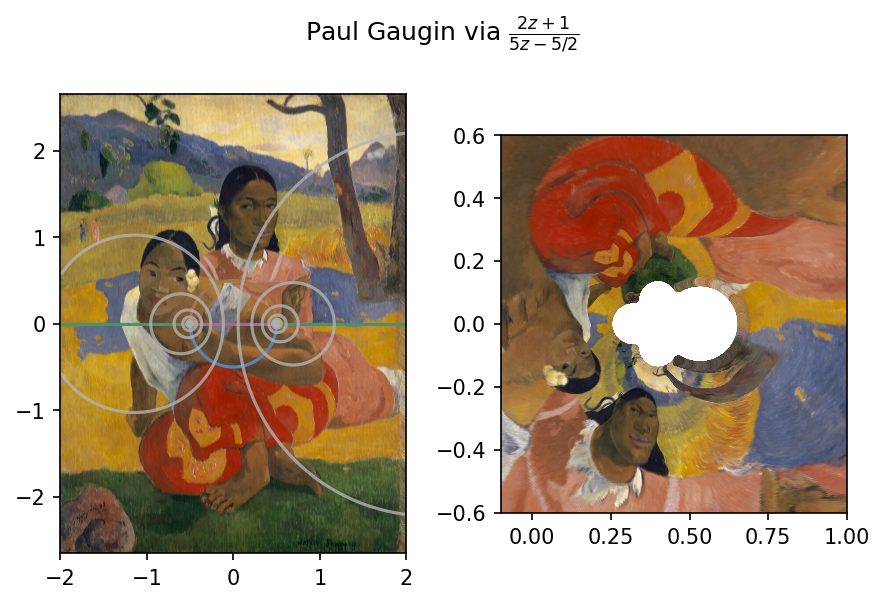

In [4]:
f_list = [
    lambda z: np.cos(z-1),
    lambda z: (2*z+1)/(5*z-5/2),
    lambda z: z**2-1,
    lambda z: np.log(z+1)
]
label_list = [
    r'$\cos(z-1)$',
    r'$\frac{2 z + 1}{5 z-5/2}$',
    r'$z^2-1$',
    r'$\log(z)$'
]

ind = 1
f, label = f_list[ind], label_list[ind]

fig, (ax_orig, ax_map) = plt.subplots(1,2, dpi=150)
fig.suptitle(r'%s via %s' % (paint, label))
ax_orig.set_aspect('equal')
ax_map.set_aspect('equal')

ax_orig.scatter(p.real, p.imag, c=imlist, marker='.')
plt.sca(ax_orig)
plt = cplot.plot_contours(f,    
                          (x0, x1, 400),
                          (y0, y1, 400),
                         )
ax_orig.set_xlim([x0, x1])
ax_orig.set_ylim([y0, y1])
fofp = f(p)
ax_map.scatter(fofp.real, fofp.imag, c=imlist, marker='.')
# ax_map.set_xlim([-1, 2])
# ax_map.set_ylim([-3, 3])

# side = 0.9
# ax_map.set_xlim([-side, side])
# ax_map.set_ylim([-side, side])

# Mobieus transform (ind 1?)
ax_map.set_xlim([-0.1, 1])
ax_map.set_ylim([-0.6, 0.6])


plt.tight_layout()
plt.show()
